# Importing Libraries

In [1]:
pip install --upgrade pandas seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings

In [3]:
warnings.warn('Error: A warning just appeared') 

C:\Users\abdul\AppData\Local\Temp\ipykernel_18180\2046917127.py:1: UserWarning: Error: A warning just appeared
  warnings.warn('Error: A warning just appeared')


In [4]:
import pandas as pd

In [5]:
import re

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
import plotly.express as px

In [9]:
import ipywidgets as widgets

In [10]:
from IPython.display import display, clear_output, FileLink

In [11]:
import base64

In [12]:
import io

In [13]:
import os

# Data Consolidation:

In [14]:
test = pd.read_csv("test.csv")

In [15]:
train = pd.read_csv("train.csv")

In [16]:
test2 = pd.read_csv('gender_submission.csv')

In [17]:
test = pd.merge(test, test2, how='inner')

In [18]:
df = pd.merge(train, test, how='outer')

In [19]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1119,1120,0,3,"Everett, Mr. Thomas James",male,40.5,0,0,C.A. 6212,15.1000,NaN,S
1280,1281,0,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.0750,NaN,S
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S
983,984,1,1,"Davidson, Mrs. Thornton (Orian Hays)",female,27.0,1,2,F.C. 12750,52.0000,B71,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
958,959,0,1,"Moore, Mr. Clarence Bloomfield",male,47.0,0,0,113796,42.4000,NaN,S
1200,1201,1,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45.0,1,0,350026,14.1083,NaN,S
1126,1127,0,3,"Vendel, Mr. Olof Edvin",male,20.0,0,0,350416,7.8542,NaN,S
988,989,0,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
228,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S


# Data Exploration:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<AxesSubplot:>

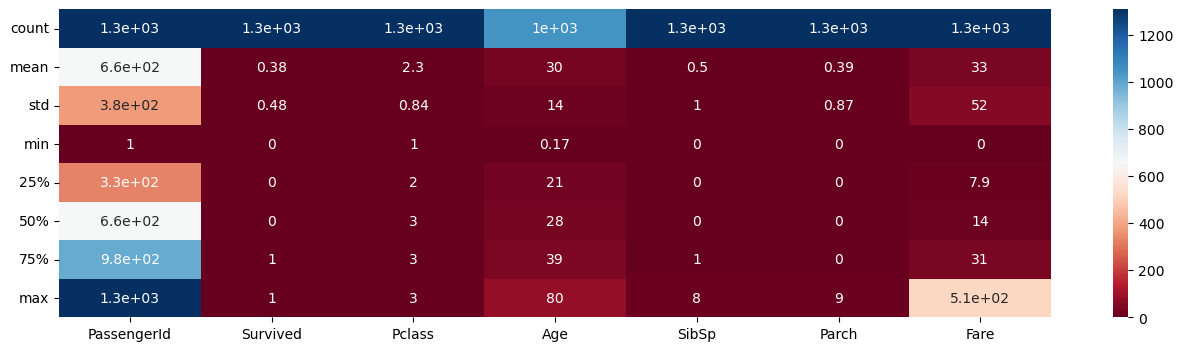

In [22]:
plt.figure(figsize=(16, 4))
sns.heatmap(df.describe(), annot=True, cmap='RdBu')

<Figure size 1600x400 with 0 Axes>

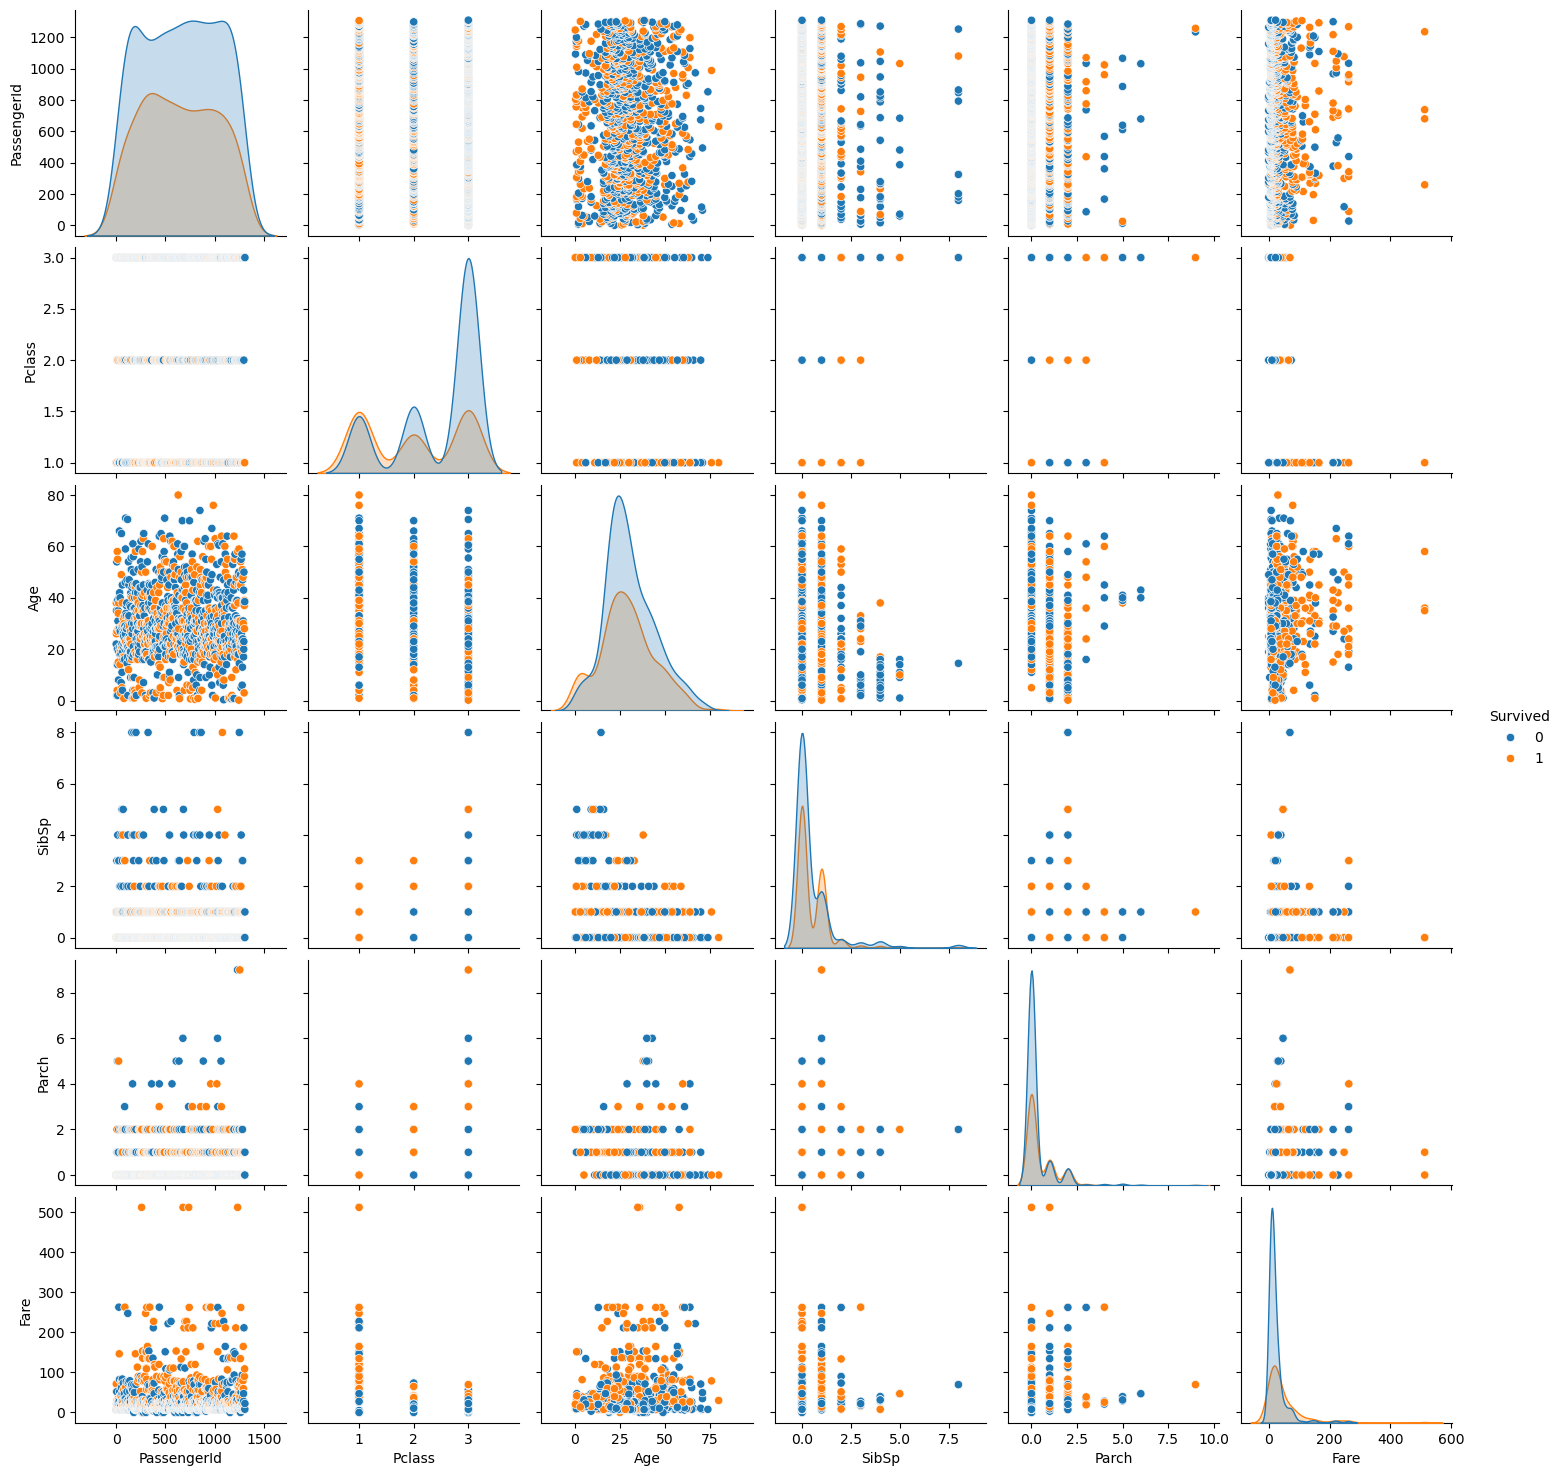

In [23]:
fig = plt.figure(figsize=(16, 4))
sns.pairplot(df, hue='Survived', diag_kind='kde')

# Data Cleaning

In [24]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [25]:
df['LastName'] = df['Name'].str.split(',').str[0].str.strip()

In [26]:
def extract_first_name(name):
    # Regex pattern to match the first name only
    match = re.search(r',\s*[^.]*\.\s*([^\s]*)', name)
    if match:
        return match.group(1).strip()
    return ''

In [27]:
df['FirstName'] = df['Name'].apply(extract_first_name)

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,William
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Woolf
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Fermina
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Simon
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Frederick


In [29]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [30]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [31]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

In [32]:
df.drop('Cabin', axis=1, inplace=True)

In [33]:
df.duplicated().sum()

0

In [34]:
print(df.dtypes)
df.head(1)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
LastName        object
FirstName       object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,Braund,Owen


In [35]:
df['Survived'] = df['Survived'].astype('category')

In [36]:
df['Pclass'] = df['Pclass'].astype('category')

In [37]:
df['LastName'] = df['LastName'].astype('category')

In [38]:
df['FirstName'] = df['FirstName'].astype('category')

In [39]:
df['Sex'] = df['Sex'].astype('category')

In [40]:
df['SibSp'] = df['SibSp'].astype('category')

In [41]:
df['Parch'] = df['Parch'].astype('category')

In [42]:
df['Embarked'] = df['Embarked'].astype('category')

In [43]:
df['Age'] = df['Age'].astype('int64')

In [44]:
print(df.dtypes)
df.head(1)

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age               int64
SibSp          category
Parch          category
Ticket           object
Fare            float64
Embarked       category
LastName       category
FirstName      category
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,S,Braund,Owen


# Exploratory Data Analysis

In [45]:
for col_name in df.columns:
    print('-----------------'*3)
    print(f"col_name -> {col_name, df[col_name].unique()[:5]}")
    print('-----------------'*3)

---------------------------------------------------
col_name -> ('PassengerId', array([1, 2, 3, 4, 5], dtype=int64))
---------------------------------------------------
---------------------------------------------------
col_name -> ('Survived', [0, 1]
Categories (2, int64): [0, 1])
---------------------------------------------------
---------------------------------------------------
col_name -> ('Pclass', [3, 1, 2]
Categories (3, int64): [1, 2, 3])
---------------------------------------------------
---------------------------------------------------
col_name -> ('Name', array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry'], dtype=object))
---------------------------------------------------
---------------------------------------------------
col_name -> ('Sex', ['male', 'female']
Categories (2, object): ['female', 'male']

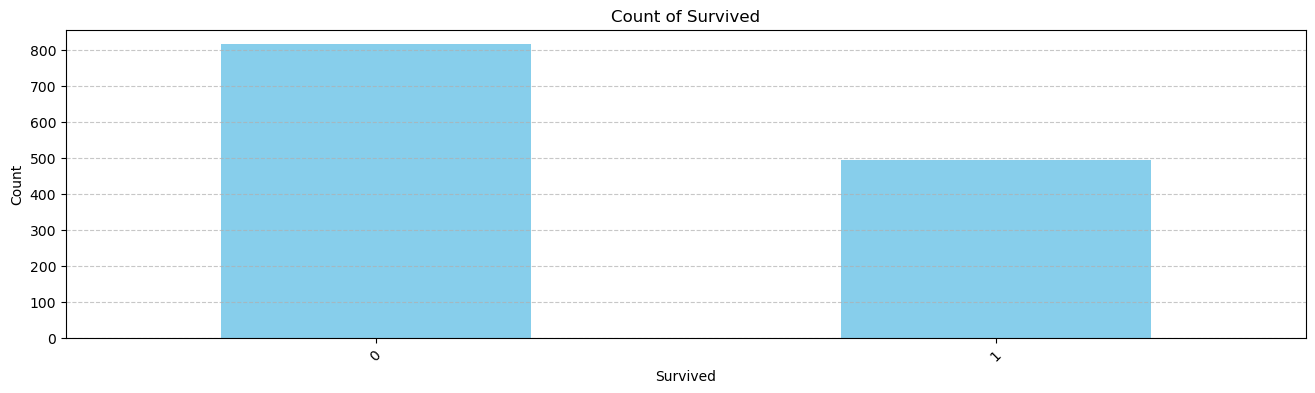

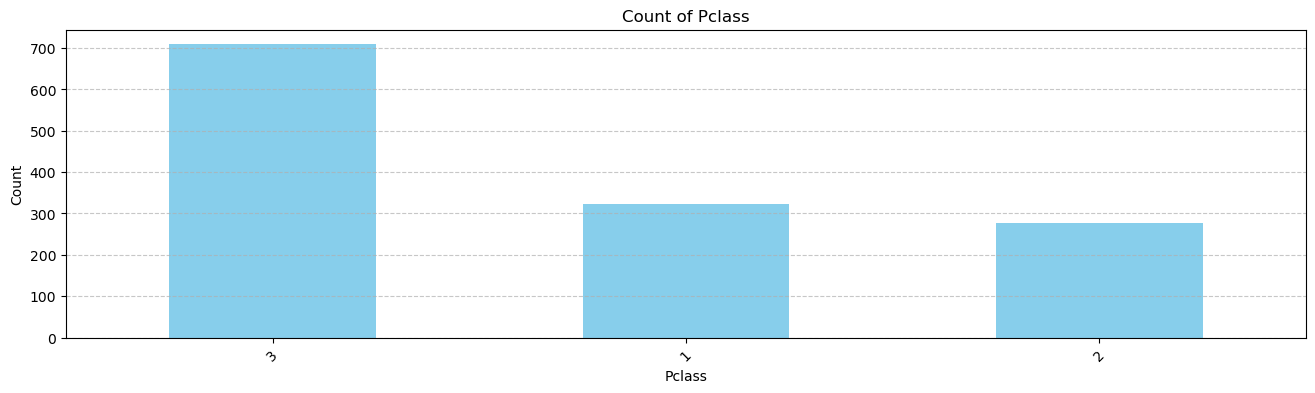

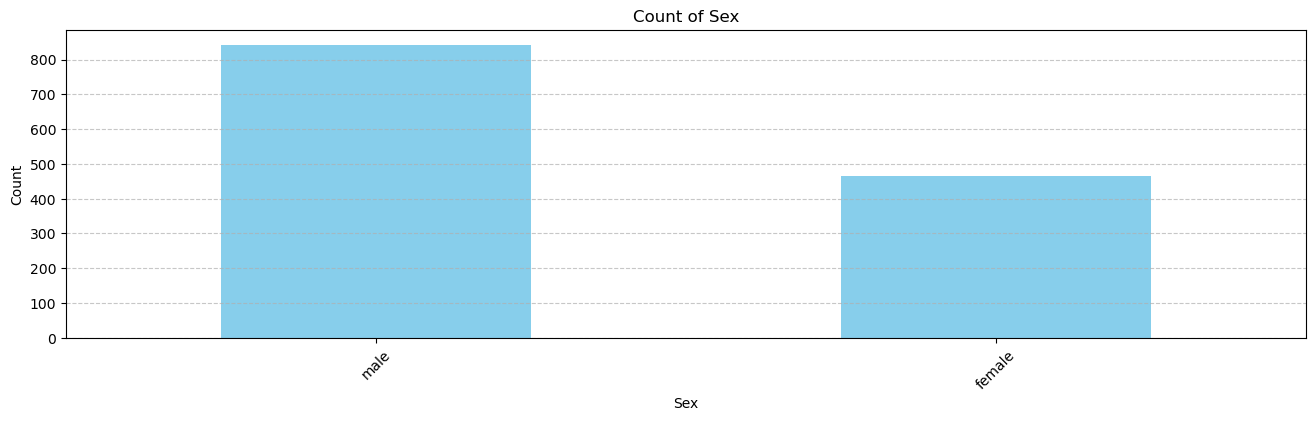

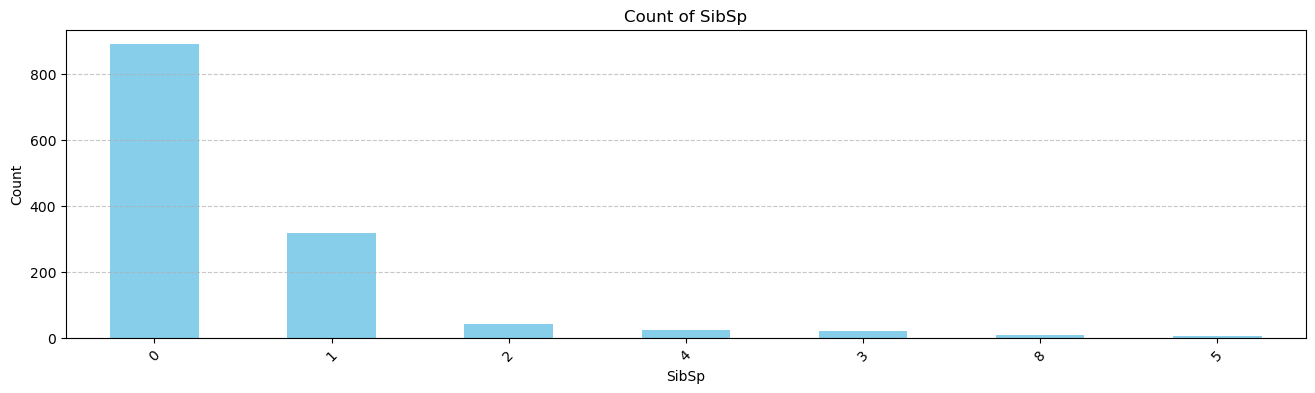

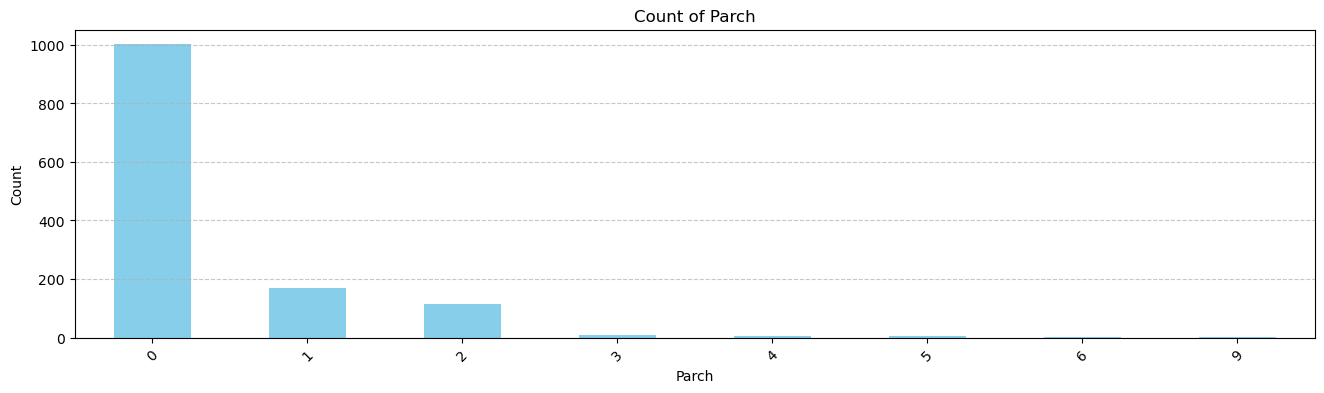

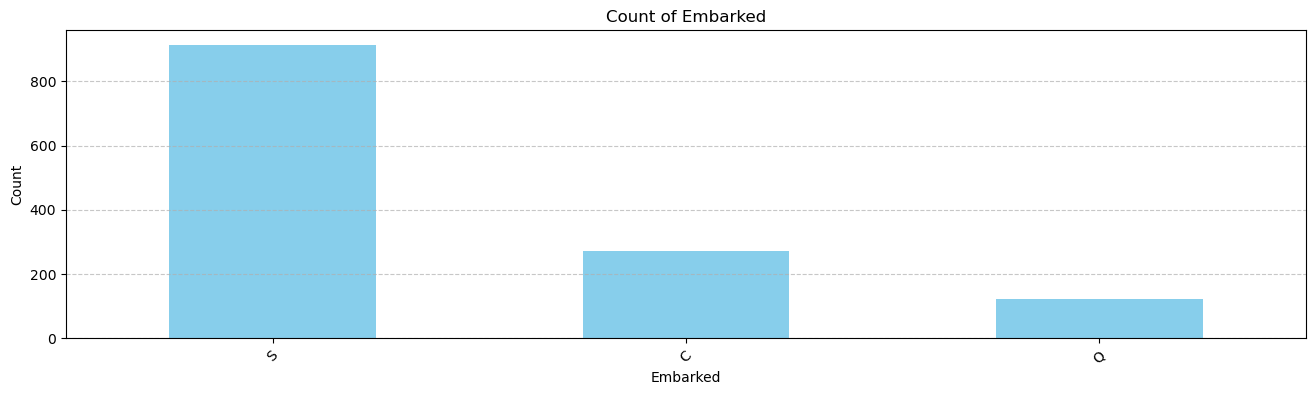

In [46]:
for col in df.select_dtypes(include='category').columns:
    if col not in ["LastName", "FirstName"]:
        plt.figure(figsize=(16, 4))
        df[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Count of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

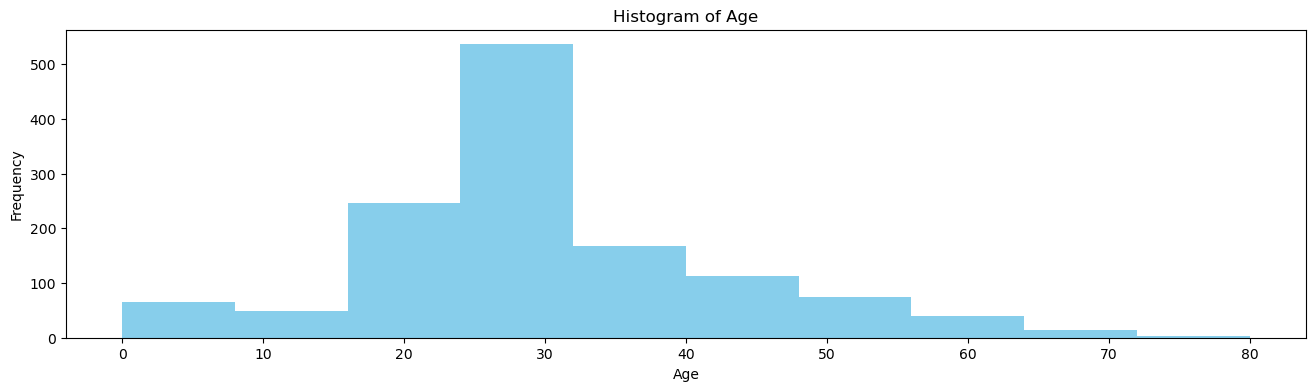

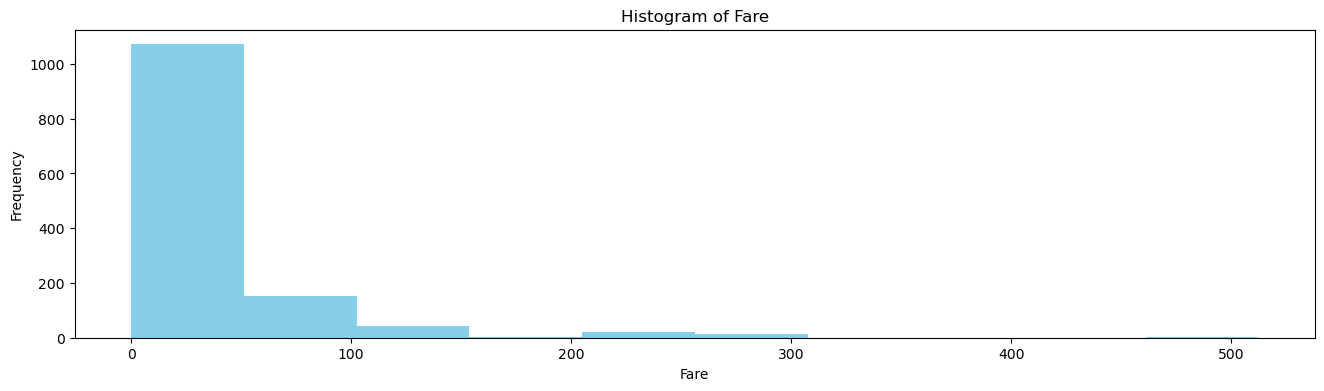

In [47]:
for col in ['Age', 'Fare']:
    plt.figure(figsize=(16, 4))
    plt.hist(df[col], bins=10, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

<AxesSubplot:xlabel='LastName'>

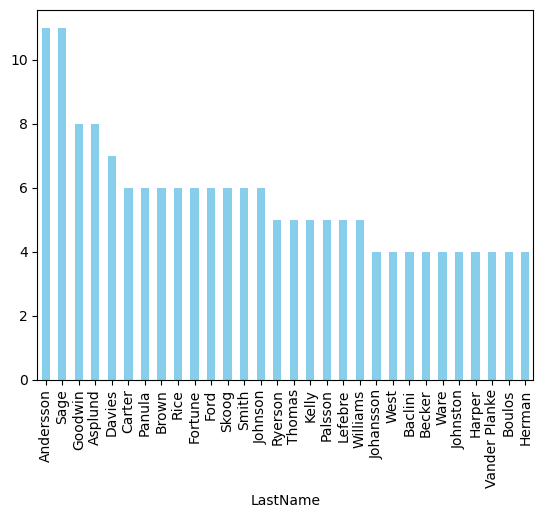

In [48]:
df['LastName'].value_counts()[:30].plot(kind='bar', color='skyblue')

<AxesSubplot:xlabel='FirstName'>

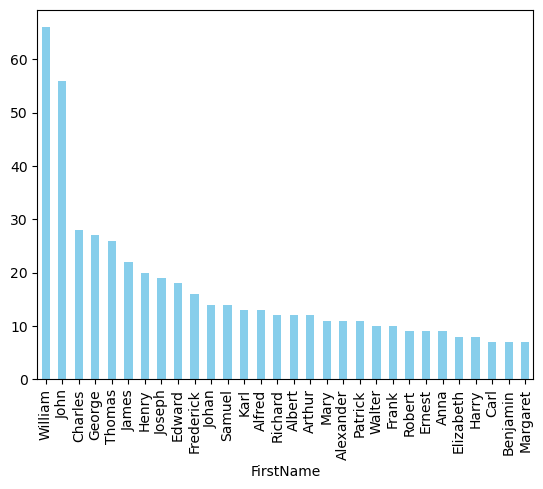

In [49]:
df['FirstName'].value_counts()[:30].plot(kind='bar', color='skyblue')

<AxesSubplot:ylabel='count'>

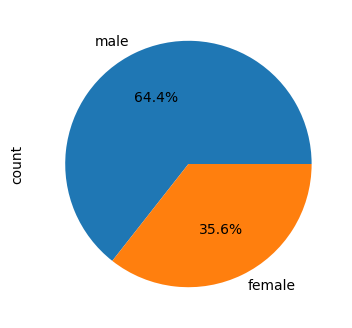

In [50]:
plt.figure(figsize=(16, 4))
df['Sex'].value_counts().plot(kind='pie',autopct='%0.01f%%', color='skyblue')

In [51]:
num_ftrs = ['Age', 'Fare']

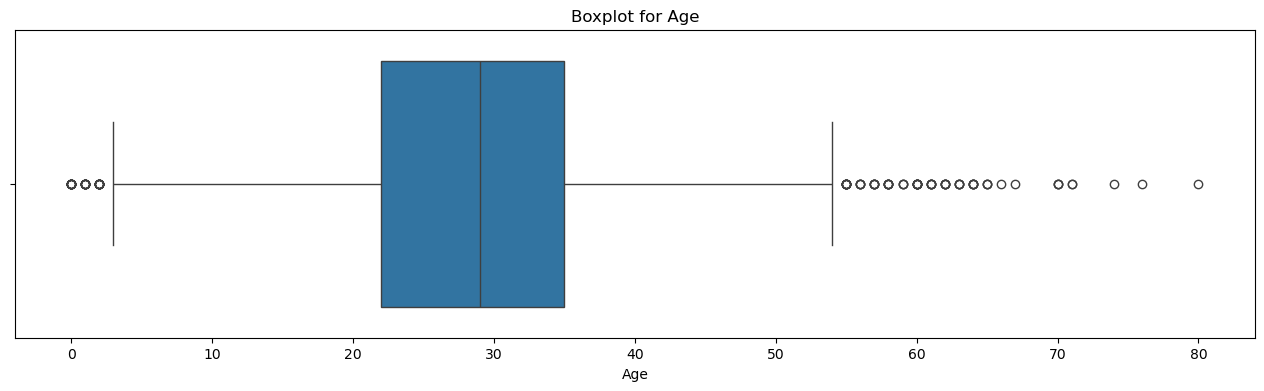

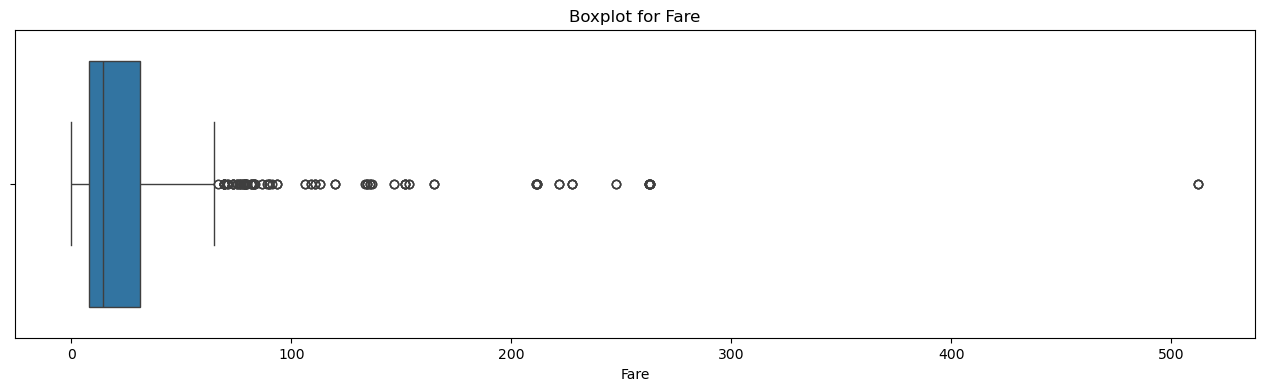

In [52]:
for i in num_ftrs:
    fig = plt.figure(figsize=(16, 4))
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [53]:
for i in num_ftrs:
    print(f'Five box summary for {i}: ')
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    minimum = df[i].min()
    maximum = df[i].max()

    print(f'''

    Q1 score: {Q1},
    ---------------------
    Q3 score: {Q3},
    ---------------------
    IQR score: {IQR},
    ---------------------
    Lower Bound score: {lower_bound},
    ---------------------
    Upper Bound score: {upper_bound},
    ---------------------
    Minimum Score: {minimum},
    ---------------------
    Maximum Score: {maximum}
    
    ''')

Five box summary for Age: 


    Q1 score: 22.0,
    ---------------------
    Q3 score: 35.0,
    ---------------------
    IQR score: 13.0,
    ---------------------
    Lower Bound score: 2.5,
    ---------------------
    Upper Bound score: 54.5,
    ---------------------
    Minimum Score: 0,
    ---------------------
    Maximum Score: 80
    
    
Five box summary for Fare: 


    Q1 score: 7.8958,
    ---------------------
    Q3 score: 31.275,
    ---------------------
    IQR score: 23.379199999999997,
    ---------------------
    Lower Bound score: -27.172999999999995,
    ---------------------
    Upper Bound score: 66.34379999999999,
    ---------------------
    Minimum Score: 0.0,
    ---------------------
    Maximum Score: 512.3292
    
    


In [54]:
outliers_age = (df['Age'] < 2.5) | (df['Age'] > 54.5)
outliers_fare = (df['Fare'] < -28) | (df['Fare'] > 67)

In [55]:
df = df[~outliers_age]
df = df[~outliers_fare]

C:\Users\abdul\AppData\Local\Temp\ipykernel_18180\991115562.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers_fare]


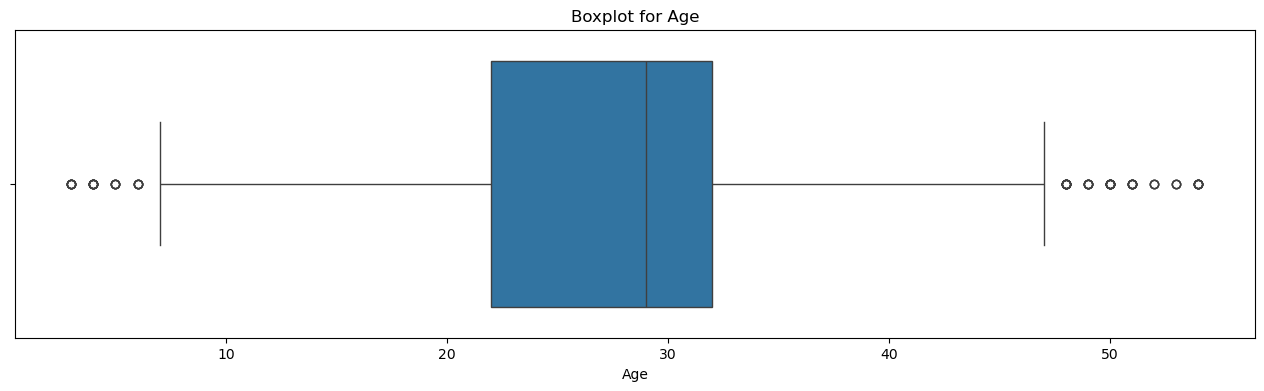

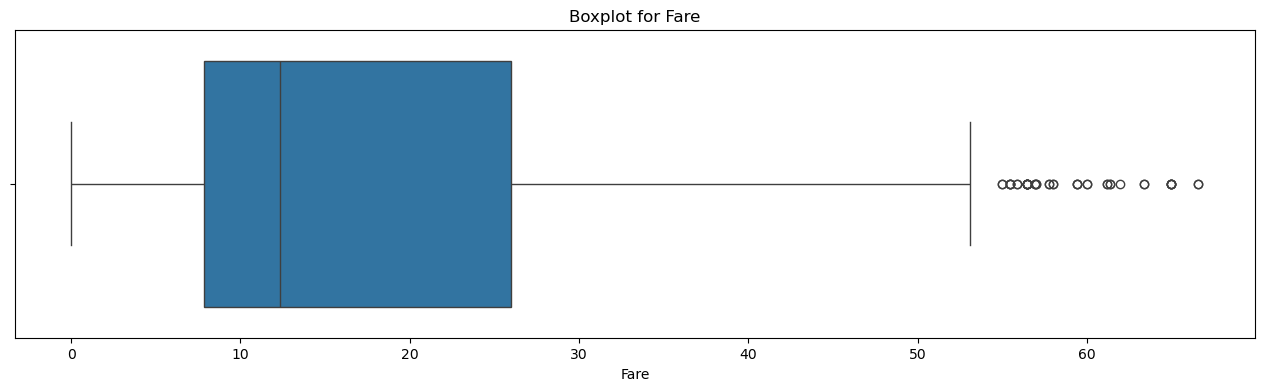

In [56]:
for i in num_ftrs:
    fig = plt.figure(figsize=(16, 4))
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [57]:
def generate_csv(data, filename='grouped_data.csv'):
    data.to_csv(filename)
    return filename

In [58]:
def display_summary(button):
    clear_output(wait=True)
    plt.close('all')
    categoric_column = categorical_dropdown.value
    analysis_type = analysis_dropdown.value
    
    if not categoric_column:
        print("Please select a categorical column.")
        return

    csv_file_path = None
    if analysis_type == 'Age':
        if categoric_column in ['LastName', 'FirstName']:
            age_mean = df.groupby(categoric_column)['Age'].mean()
            top_10_age_mean = age_mean.sort_values(ascending=False).head(10)
            plt.figure(figsize=(12, 6))
            top_10_age_mean.plot(kind='bar', color='skyblue')
            plt.title(f'Mean Age by {categoric_column}')
            plt.xlabel(categoric_column)
            plt.ylabel('Mean Age')
            plt.show()
            print(f"Mean Age by {categoric_column}:")
            print(top_10_age_mean)
            csv_file_path = generate_csv(age_mean.reset_index(), 'age_mean.csv')
        else:
            if categoric_column not in df.columns or df[categoric_column].dtype != 'category':
                print(f"Invalid column selected for Age analysis: {categoric_column}")
                return
            age_mean = df.groupby(categoric_column)['Age'].mean()
            plt.figure(figsize=(12, 6))
            age_mean.sort_values(ascending=False).plot(kind='bar', color='skyblue')
            plt.title(f'Mean Age by {categoric_column}')
            plt.xlabel(categoric_column)
            plt.ylabel('Mean Age')
            plt.show()
            print(f"Mean Age by {categoric_column}:")
            print(age_mean)
            csv_file_path = generate_csv(age_mean.reset_index(), 'age_mean.csv')
            
    elif analysis_type == 'Fare':
        if categoric_column in ['LastName', 'FirstName']:
            fare_summary = df.groupby(categoric_column)['Fare'].agg(['sum', 'mean'])
            top_10_fare_summary_sum = fare_summary['sum'].sort_values(ascending=False).head(10)
            top_10_fare_summary_mean = fare_summary['mean'].sort_values(ascending=False).head(10)
            
            fig, axes = plt.subplots(2, 1, figsize=(12, 12))
            top_10_fare_summary_sum.plot(kind='bar', ax=axes[0], color='salmon')
            axes[0].set_title('Top 10 Sum of Fare by Category')
            axes[0].set_ylabel('Sum of Fare')
            top_10_fare_summary_mean.plot(kind='bar', ax=axes[1], color='lightgreen')
            axes[1].set_title('Top 10 Mean of Fare by Category')
            axes[1].set_ylabel('Mean of Fare')
            plt.tight_layout()
            plt.show()
            
            print(f"Sum and Mean of Fare by {categoric_column}:")
            print("Top 10 Sum of Fare:")
            print(top_10_fare_summary_sum)
            print("\nTop 10 Mean of Fare:")
            print(top_10_fare_summary_mean)
            csv_file_path = generate_csv(fare_summary.reset_index(), 'fare_summary.csv')
        else:
            if categoric_column not in df.columns or df[categoric_column].dtype != 'category':
                print(f"Invalid column selected for Fare analysis: {categoric_column}")
                return
            fare_summary = df.groupby(categoric_column)['Fare'].agg(['sum', 'mean'])
            fig, axes = plt.subplots(2, 1, figsize=(12, 12))
            fare_summary['sum'].sort_values(ascending=False).plot(kind='bar', ax=axes[0], color='salmon')
            axes[0].set_title('Sum of Fare by Category')
            axes[0].set_ylabel('Sum of Fare')
            fare_summary['mean'].sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='lightgreen')
            axes[1].set_title('Mean of Fare by Category')
            axes[1].set_ylabel('Mean of Fare')
            plt.tight_layout()
            plt.show()
            
            print(f"Sum and Mean of Fare by {categoric_column}:")
            print("Sum of Fare:")
            print(fare_summary['sum'].sort_values(ascending=False))
            print("\nMean of Fare:")
            print(fare_summary['mean'].sort_values(ascending=False))
            csv_file_path = generate_csv(fare_summary.reset_index(), 'fare_summary.csv')
            
    elif analysis_type == 'PassengerId':
        if categoric_column not in df.columns or df[categoric_column].dtype != 'category':
            print(f"Invalid column selected for PassengerId analysis: {categoric_column}")
            return
        passenger_count = df.groupby(categoric_column)['PassengerId'].count()
        top_10_passengers = passenger_count.sort_values(ascending=False).head(10)
        plt.figure(figsize=(12, 6))
        top_10_passengers.plot(kind='bar', color='steelblue')
        plt.title('Top 10 Categories by Number of Passengers')
        plt.xlabel(categoric_column)
        plt.ylabel('Number of Passengers')
        plt.show()
        print("\nTotal number of passengers by category (Top 10):")
        print(top_10_passengers)
        csv_file_path = generate_csv(passenger_count.reset_index(), 'passenger_count.csv')
        
    else:
        print("Invalid analysis type selected.")
    
    if csv_file_path:
        # Create a download link for the CSV file
        download_link = FileLink(csv_file_path)
        display(download_link)
    
    display(back_button)

In [59]:
def go_back(button):
    clear_output(wait=True)
    display(categorical_dropdown, analysis_dropdown, submit_button) 

In [60]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'category']
analysis_types = ['Age', 'Fare', 'PassengerId']

categorical_dropdown = widgets.Dropdown(
    options=categorical_columns,
    description='Categorical Column:',
    disabled=False
)

analysis_dropdown = widgets.Dropdown(
    options=analysis_types,
    description='Analysis Type:',
    disabled=False
)

submit_button = widgets.Button(
    description='Submit',
    disabled=False,
    button_style='success',
    tooltip='Click to display results'
)

back_button = widgets.Button(
    description='Back',
    disabled=False,
    button_style='warning',
    tooltip='Go back to selection'
)

submit_button.on_click(display_summary)
back_button.on_click(go_back)

C:\Users\abdul\AppData\Local\Temp\ipykernel_18180\1453166556.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_mean = df.groupby(categoric_column)['Age'].mean()


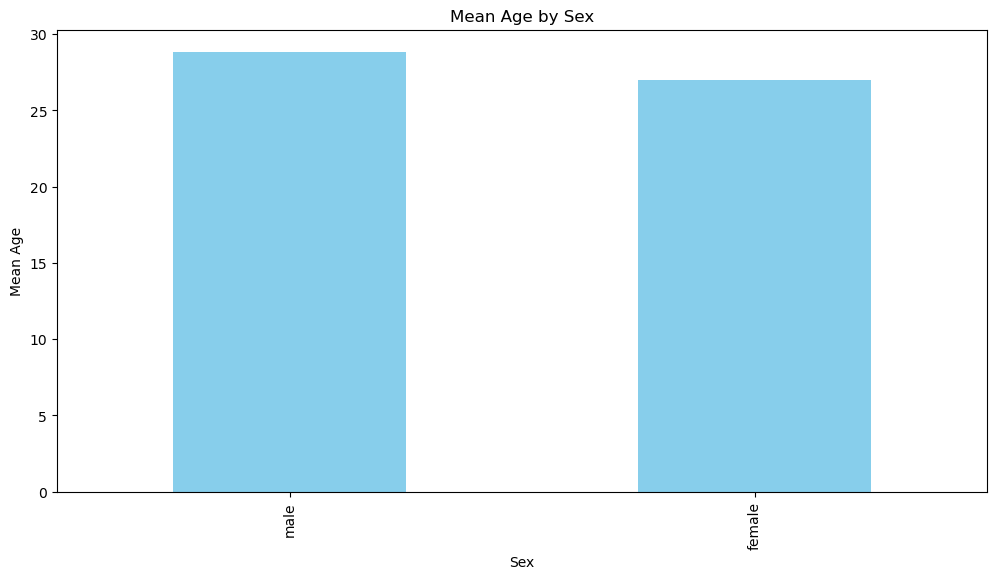

Mean Age by Sex:
Sex
female    27.014535
male      28.851389
Name: Age, dtype: float64


C:\Users\abdul\sirfaisalaminprojects\age_mean.csv

Button(button_style='warning', description='Back', style=ButtonStyle(), tooltip='Go back to selection')

In [61]:
display(categorical_dropdown, analysis_dropdown, submit_button)

C:\Users\abdul\AppData\Local\Temp\ipykernel_18180\1453166556.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_summary = df.groupby(categoric_column)['Fare'].agg(['sum', 'mean'])


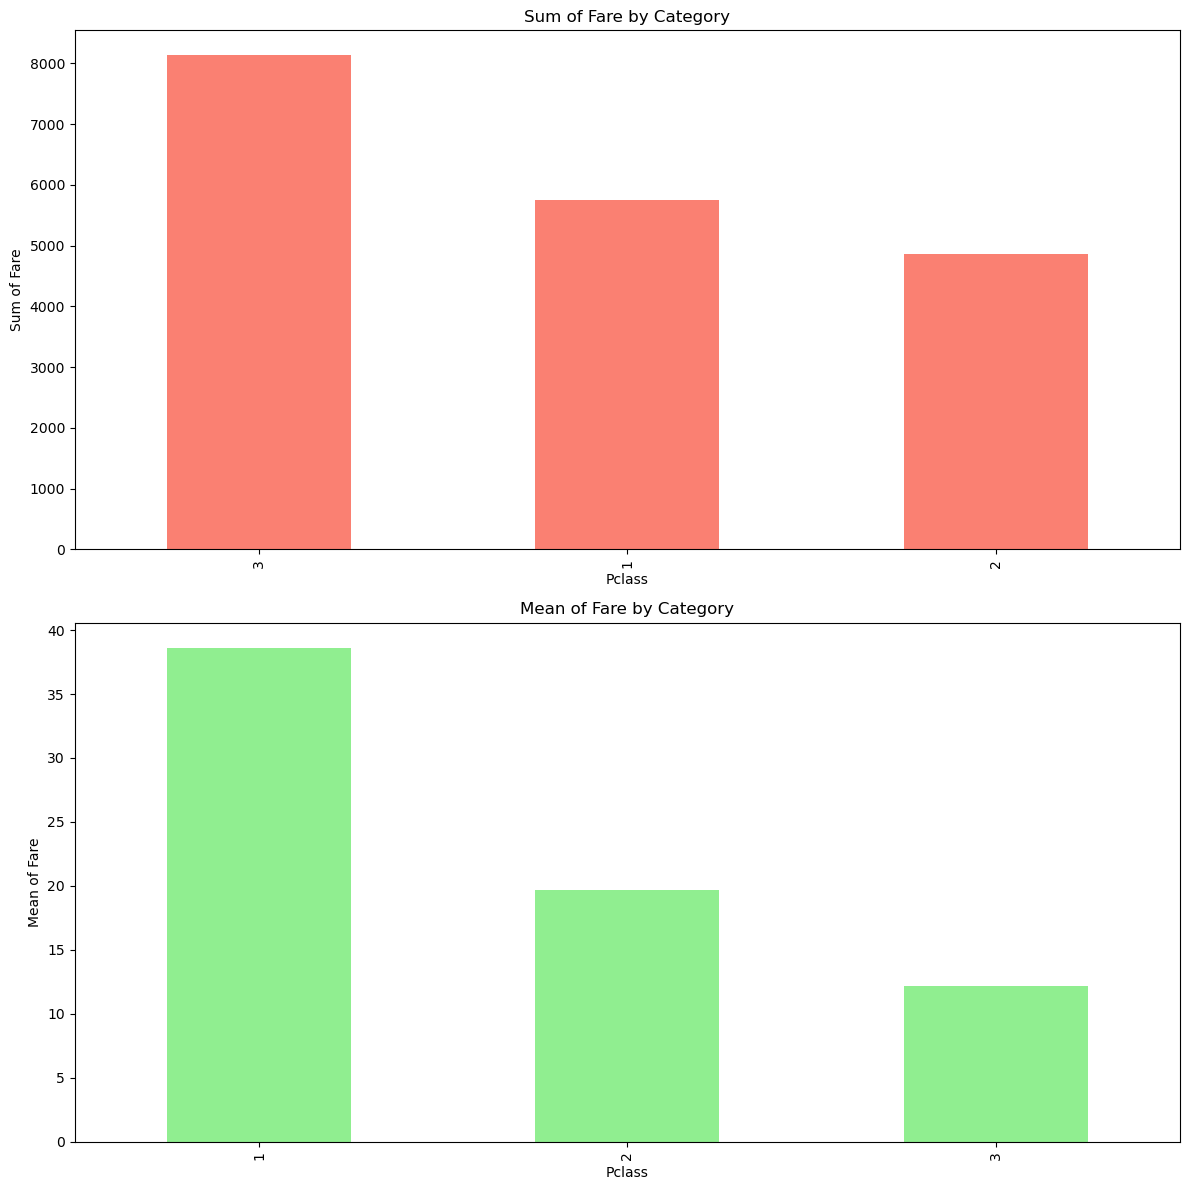

Sum and Mean of Fare by Pclass:
Sum of Fare:
Pclass
3    8138.9161
1    5756.0418
2    4859.6665
Name: sum, dtype: float64

Mean of Fare:
Pclass
1    38.631153
2    19.674763
3    12.184006
Name: mean, dtype: float64


C:\Users\abdul\sirfaisalaminprojects\fare_summary.csv

Button(button_style='warning', description='Back', style=ButtonStyle(), tooltip='Go back to selection')

In [62]:
display(categorical_dropdown, analysis_dropdown, submit_button)

C:\Users\abdul\AppData\Local\Temp\ipykernel_18180\1453166556.py:88: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passenger_count = df.groupby(categoric_column)['PassengerId'].count()


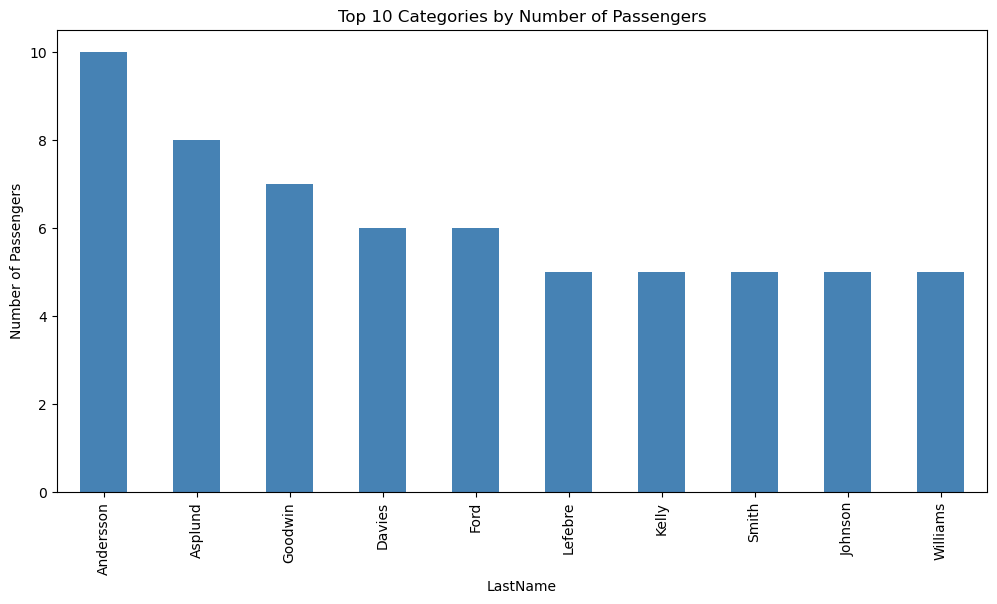


Total number of passengers by category (Top 10):
LastName
Andersson    10
Asplund       8
Goodwin       7
Davies        6
Ford          6
Lefebre       5
Kelly         5
Smith         5
Johnson       5
Williams      5
Name: PassengerId, dtype: int64


C:\Users\abdul\sirfaisalaminprojects\passenger_count.csv

Button(button_style='warning', description='Back', style=ButtonStyle(), tooltip='Go back to selection')

In [63]:
display(categorical_dropdown, analysis_dropdown, submit_button)

# Key Findings

The majority of lives were lost in this tragedy.

A significant number of passengers booked Third Class (Pclass-3) due to its affordability, whereas fewer opted for Third Class because of its higher cost.

The majority of passengers were male.

Most passengers traveled alone or with one sibling or spouse.

The predominant embarkation point was Southampton (S).

Passengers were generally between their 20s and 50s.

Fares ranged from 0 to 100.

The most common surname among passengers was Anderson, while William was the most frequent first name.

Survivors had an average age of 27, whereas those who did not survive had an average age of 28.

Pclass-3 generated the highest revenue, while First Class (Pclass-1) had the highest average fare.

Out of the total passengers, approximately 720 were male and 344 were female.

Southampton (S) was the leading embarkation point in terms of revenue, while Cherbourg (C) had the highest average fare.

# Done